# <center>Sentiment Analysis on Harvard University Reviews</center>

** **
## <center>*01 - Exploratory Data Analysis Notebook*</center>

This project was developed with the aim of analysing and undestanding the sentiment transmited by Reviews of the Harvard University. This is a topic within Education, whose conclusions could lead to better decision making in what to improve in order to make Harvard University even better.

This dataset was collected from Kaggle, and is available in [Harvard University Ratings and Reviews](https://www.kaggle.com/datasets/kanchana1990/harvard-university-ratings-and-reviews).

This dataset is composed by 7 different columns, as follows:

- *published_date* - timestamp of when the review was posted;
- *published_platform* - indicates which platform was used to make the review;
- *rating* - numerical rating (1-5) given by the reviewer;
- *type* - type of submission;
- *helpful_votes* - number of times a review was marked as helpful;
- *title* - headline of the review;
- *text* - review.

This project will be divided into 2 notebooks and 2 external *py* files. 

The first notebook consists of Exploratory Data Analysis, where the data is explored and cleaned. For this notebook, an external file was used, *functions2*, which includes functions used throughout the notebook.

The second notebook consists of Sentiment Analysis using Lexicon-based algorithms, such as *Vader*, *TextBlob*, *SentiWordNet*, *AFINN*. After the implementation of said algorithms, the results will be evaluated and conclusions will be taken. For the development of this notebook the file *functions_SA* was used.

** **

This project was developed by <br><br>

*<center>António Oliveira - 2023039 - Industrial Applications of AI*

** **

# Table of Contents

1. [Importing Data & Libraries](#1.-Importing-Data-&-Libraries)

    1.1 [Libraries](#1.1-Libraries)
    
    1.2 [Data](#1.2-Importing-Data)
    
    1.3 [Initial Exploration](#1.3-Initial-Exploration) <br><br>
    
2. [Exploratory Data Analysis](#2.Exploratory-Data-Analysis)

    2.1 [Missing Values](#2.1-Missing-Values)
    
    2.2 [Duplicates](#2.2-Duplicates)
    
    2.3 [Feature Engineering](#2.3-Feature-Engineering)
    
    2.4 [Outliers](#2.4-Outliers) <br><br>
    
3. [Text Preprocessing](#3.-Text-Preprocessing)    <br><br>

4. [Visualisations](#4.-Visualisations) <br><br>
    
5. [Export](#5.-Export) <br><br>

6. [AI Statement](#6.-AI-Statement)

** **

## 1. Importing Data & Libraries

### 1.1 Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# Defining a Colour Palette
palette = sns.color_palette("dark:salmon_r")

# wordclouds
from wordcloud import WordCloud


# external py file
import functions2

# Warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Checking the functions in the external file

In [2]:
functions = [func for func in dir(functions2) if callable(getattr(functions2, func))]

# Print the list of functions
print("Functions in the external module:\n")
for func in functions:
    print(func+ '\n')

Functions in the external module:

PorterStemmer

WordNetLemmatizer

detect

detect_language

detect_outliers_per_column

plot_boxplots

preprocessor

sent_tokenize

stopword_remover

translate_with_deepl

word_tokenize



### 1.2 Data

In [3]:
data = pd.read_csv('/Users/antoniooliveira/Projects/Industrial Applications of AI/Assignment 4/harvard_reviews.csv')
data.head(3)

published_date published_platform  rating    type  \
0  2023-12-28T08:02:14-05:00             Mobile       5  review   
1  2023-12-12T00:38:26-05:00            Desktop       4  review   
2  2023-12-10T08:21:35-05:00             Mobile       3  review   

   helpful_votes                               title  \
0              0  Best classes and good environment    
1              0                  Harvard University   
2              0                  Walk around campus   

                                                text  
0  Good thanks for everything good work group 👍 h...  
1  Harvard University was founded in 1636 and is ...  
2  We did a walk around most of the Harvard Campu...

### 1.3 Initial Exploration

**Describe & Info**

In [4]:
data.describe()

rating  helpful_votes
count  3184.000000    3184.000000
mean      4.456658       0.498744
std       0.744024       2.819638
min       1.000000       0.000000
25%       4.000000       0.000000
50%       5.000000       0.000000
75%       5.000000       1.000000
max       5.000000     111.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3184 entries, 0 to 3183
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   published_date      3184 non-null   object
 1   published_platform  3184 non-null   object
 2   rating              3184 non-null   int64 
 3   type                3184 non-null   object
 4   helpful_votes       3184 non-null   int64 
 5   title               3184 non-null   object
 6   text                3184 non-null   object
dtypes: int64(2), object(5)
memory usage: 174.2+ KB


**Unique Values**

In [6]:
data.nunique()

published_date        3184
published_platform       2
rating                   5
type                     1
helpful_votes           15
title                 2891
text                  3184
dtype: int64

In [7]:
list_ = ['published_platform', 'rating', 'type', 'helpful_votes']

for value in list_:
    unique_values = data[value].unique()
    print(f"Unique values in column '{value}': \n {unique_values} \n\n")



Unique values in column 'published_platform': 
 ['Mobile' 'Desktop'] 


Unique values in column 'rating': 
 [5 4 3 1 2] 


Unique values in column 'type': 
 ['review'] 


Unique values in column 'helpful_votes': 
 [  0   2   1   3  91   4  19  48   5   7   8   6 111  14  10] 




Since the variable *type* is always the same, it will be dropped.

In [8]:
data = data.drop('type', axis = 1)

## 2 Exploratory Data Analysis

### 2.1 Missing Values

In [9]:
data.isnull().sum()

published_date        0
published_platform    0
rating                0
helpful_votes         0
title                 0
text                  0
dtype: int64

As it can be observed, there are no missing values in this dataset.

### 2.2 Duplicates

In [10]:
data[data.duplicated()]

Empty DataFrame
Columns: [published_date, published_platform, rating, helpful_votes, title, text]
Index: []

After checking for duplicate values, none were found.

### 2.3 Feature Engineering

**Published Date**

In order to gain insights from *published_date*, its type needs to be changed to *datetime*. The timezone of each observation will also be standardised.

In [11]:
# Transforming published_date to datetime and setting all observations to the same timezone
data['published_date'] = pd.to_datetime(data['published_date'], utc=True)
data['published_date']

0      2023-12-28 13:02:14+00:00
1      2023-12-12 05:38:26+00:00
2      2023-12-10 13:21:35+00:00
3      2023-11-08 02:20:21+00:00
4      2023-10-02 21:40:42+00:00
                  ...           
3179   2010-10-29 09:47:57+00:00
3180   2010-08-23 10:08:51+00:00
3181   2010-08-23 04:06:41+00:00
3182   2010-06-03 11:37:36+00:00
3183   2009-09-27 20:39:18+00:00
Name: published_date, Length: 3184, dtype: datetime64[ns, UTC]

Extracting information from the converted variable *published_date*

In [12]:
data['Hour'] = data['published_date'].dt.dayofweek 
data['Day'] = data['published_date'].dt.day
data['Month'] = data['published_date'].dt.month
data['Year'] = data['published_date'].dt.year
data['Timezone'] = data['published_date'].dt.tz

### 2.4 Outliers

Looking for outliers by means of Boxplots.

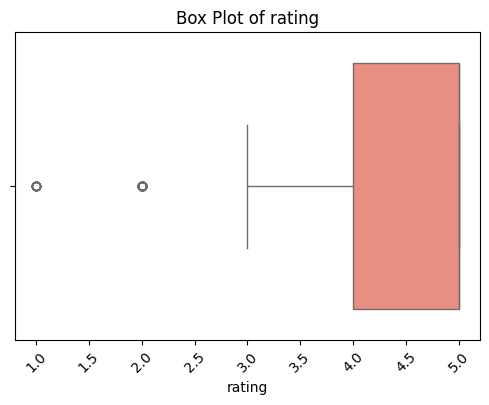

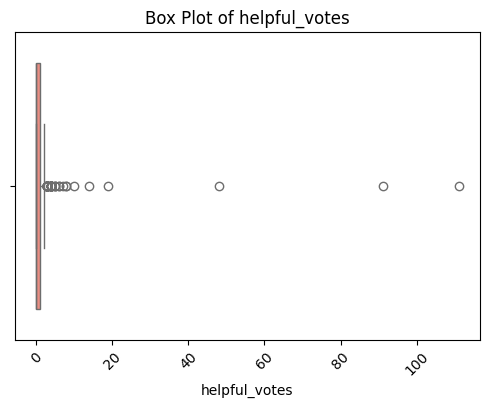

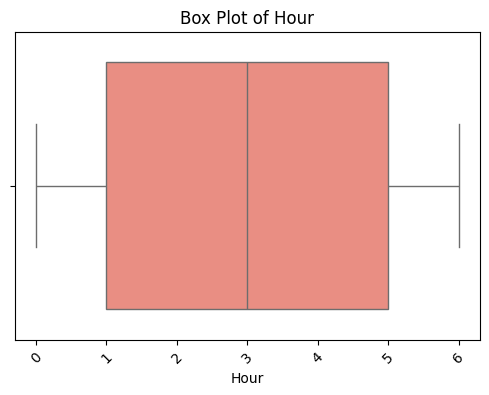

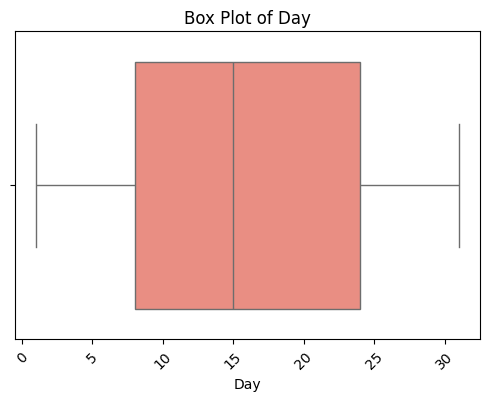

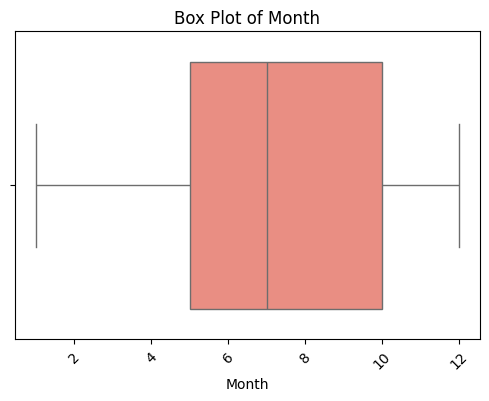

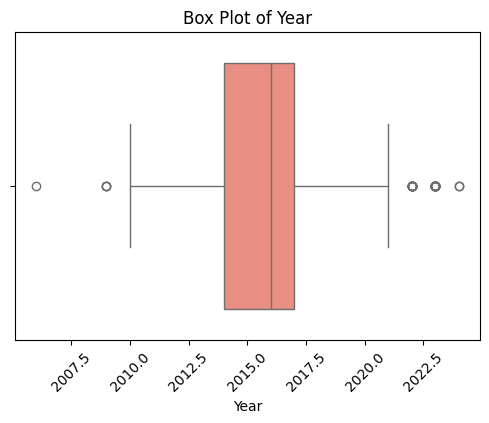

In [13]:
# Get a list of all numeric column names
columns_to_check = data.select_dtypes(include=['int', 'float']).columns.to_list()
        
functions2.plot_boxplots(data, columns_to_check, palette=palette)

Taking a closer look at the variables that show Outliers by using Statistical methods.

In [14]:
columns_to_check = ['rating', 'helpful_votes', 'Year']
outlier_info = functions2.detect_outliers_per_column(data, columns_to_check)

# Print information for each column
for column, info in outlier_info.items():
    print(f"Column: {column}")
    print(f"Lower Bound: {info['lower_bound']}")
    print(f"Upper Bound: {info['upper_bound']}")
    print(f"Number of outliers: {info['outlier_count']}")
    print("--------------------")


Column: rating
Lower Bound: 2.5
Upper Bound: 6.5
Number of outliers: 60
--------------------
Column: helpful_votes
Lower Bound: -1.5
Upper Bound: 2.5
Number of outliers: 87
--------------------
Column: Year
Lower Bound: 2009.5
Upper Bound: 2021.5
Number of outliers: 50
--------------------


Taking a closer look at each individual variable taking into account the upper and lower bounds previously computed.

In [15]:
data[(data['rating'] < 2.5) | (data['rating'] > 5)]

published_date published_platform  rating  helpful_votes  \
31   2022-03-19 17:24:53+00:00            Desktop       1              0   
42   2021-08-17 07:21:52+00:00             Mobile       2              0   
60   2020-01-02 10:51:16+00:00             Mobile       2              0   
228  2018-10-13 20:06:23+00:00             Mobile       2              0   
298  2018-07-07 17:20:45+00:00             Mobile       2              0   
309  2018-06-15 11:59:56+00:00            Desktop       1              3   
324  2018-05-25 22:46:16+00:00             Mobile       1              1   
368  2018-01-05 13:44:12+00:00            Desktop       2              2   
449  2017-09-08 06:16:35+00:00            Desktop       2              0   
483  2017-08-08 20:54:53+00:00            Desktop       2              2   
504  2017-07-26 09:01:18+00:00            Desktop       2              3   
543  2017-06-20 22:46:04+00:00            Desktop       2              1   
552  2017-06-08 09:25:52+00:00            Desktop       2              0   
692  2016-10-28 22:36:02+00:00             Mobile       2              0   
743  2016-08-31 16:36:50+00:00            Desktop       2              0   
887  2016-05-18 15:14:36+00:00            Desktop       2              0   
936  2016-02-25 23:02:35+00:00             Mobile       2              0   
979  2015-12-22 23:33:41+00:00            Desktop       1              2   
1026 2015-10-26 14:48:22+00:00            Desktop       2              0   
1103 2015-08-30 09:31:35+00:00            Desktop       1              0   
1120 2015-08-13 15:22:21+00:00            Desktop       1              1   
1209 2015-06-07 14:03:57+00:00            Desktop       2              1   
1265 2015-03-24 12:18:29+00:00            Desktop       2              1   
1378 2014-08-27 00:09:35+00:00            Desktop       2              0   
1406 2014-08-02 15:23:16+00:00            Desktop       2              1   
1422 2014-07-20 21:33:47+00:00            Desktop       2              1   
1431 2014-07-01 22:51:11+00:00            Desktop       1              1   
1439 2014-06-25 13:31:20+00:00            Desktop       1              4   
1528 2013-11-25 15:19:09+00:00            Desktop       1              1   
1563 2013-09-04 22:24:04+00:00            Desktop       2              0   
1589 2013-08-04 01:42:19+00:00            Desktop       2              1   
1631 2013-04-20 19:14:11+00:00            Desktop       2              1   
1644 2013-04-06 18:26:11+00:00            Desktop       1              2   
1730 2012-09-24 10:48:27+00:00            Desktop       2              1   
1736 2012-09-14 17:20:58+00:00            Desktop       2              1   
1780 2012-07-11 20:34:12+00:00             Mobile       1              0   
1818 2012-04-25 17:58:41+00:00            Desktop       2              2   
1827 2012-04-08 08:40:14+00:00            Desktop       2              0   
1837 2012-03-22 09:44:29+00:00            Desktop       2              0   
1846 2012-03-02 01:03:14+00:00            Desktop       2              6   
1875 2011-12-24 09:38:14+00:00            Desktop       2              0   
1884 2011-11-23 21:56:53+00:00            Desktop       1              0   
1885 2011-11-21 21:46:26+00:00            Desktop       2              1   
1886 2011-11-21 19:46:38+00:00            Desktop       2              1   
1927 2022-09-06 04:56:59+00:00             Mobile       2              0   
1962 2019-10-08 17:17:25+00:00            Desktop       2              1   
1987 2019-08-17 00:18:24+00:00             Mobile       2              3   
2063 2018-09-26 18:59:43+00:00             Mobile       2              0   
2128 2018-06-02 21:14:11+00:00            Desktop       2              0   
2144 2018-04-14 11:15:48+00:00             Mobile       1              0   
2146 2018-04-10 21:57:08+00:00             Mobile       2              0   
2443 2016-08-10 21:59:25+00:00            Desktop       2       

As the *rating* variable has values that range from 1 to 5, the detected outliers look like low ratings, which even if not common, are important. Consequently, they will not be removed.

In [16]:
data[(data['helpful_votes'] < 0) ]#| (data['helpful_votes'] > 2.5)]

Empty DataFrame
Columns: [published_date, published_platform, rating, helpful_votes, title, text, Hour, Day, Month, Year, Timezone]
Index: []

Since there are no negative values for *helpful_votes*, the detected outliers just show high values, which again are not common, but still important. Therefore they will not be removed

In [17]:
data[(data['Year'] < 2010) | (data['Year'] > 2024)]

published_date published_platform  rating  helpful_votes  \
1914 2009-07-14 14:33:17+00:00            Desktop       5              4   
1915 2009-02-11 01:05:18+00:00            Desktop       4              3   
1916 2006-04-30 00:00:00+00:00            Desktop       5              3   
3183 2009-09-27 20:39:18+00:00            Desktop       5              1   

                                     title  \
1914  Tour of Harvard University - A must!   
1915        The Most Student Friendly City   
1916       Wandering the Unviersity Campus   
3183                               一度は行くべき   

                                                   text  Hour  Day  Month  \
1914  On our recent vacation to Boston, we wanted to...     1   14      7   
1915  A stay in Boston is incomplete without a visit...     2   11      2   
1916  Wandering around the Cambridge campus of Harva...     6   30      4   
3183  とても歴史のある素敵な建物です。ハーバードスクエアーの駅の近くから無料のツアー（英語）をハー...     6   27      9   

      Year Timezone  
1914  2009      UTC  
1915  2009      UTC  
1916  2006      UTC  
3183  2009      UTC

Since all reviews were made before 2024 the detected outliers will not be removed

## 3. Text Preprocessing

Having noticed that there are non-English Reviews, the language in each review will now be detected through the usage of the *langdetect* library.

**Language Detection**

In [18]:
data['language'] = data['text'].apply(functions2.detect_language)

Listing the Unique Values of Language.

In [19]:
list_ = ['language']
for value in list_:
    unique_values = data[value].unique()
    print(f"Unique values in column '{value}': \n {unique_values} \n\n")

Unique values in column 'language': 
 ['en' 'de' 'pt' 'es' 'ja' 'fr' 'it' 'pl' 'tr' 'el' 'ru' 'nl' 'sv' 'ko'
 'no' 'id' 'zh-cn' 'hu' 'ar' 'he' 'da' 'zh-tw' 'th' 'sk'] 




Displaying the Number of Observations per Language.

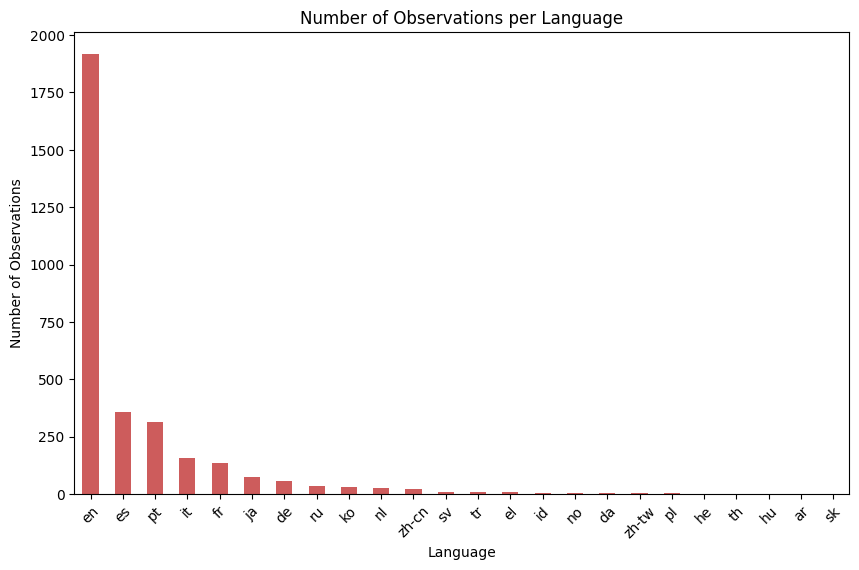

In [20]:
# Count observations by language
language_counts = data['language'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='indianred')
plt.title('Number of Observations per Language')
plt.xlabel('Language')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()

Even though most observations are in English (~60%), it is worth it to try to translate the remaining observations, since they still constitute a significant part of the dataset.

To do so, I explored several options, such as *libretranslatepy*, *translate* libraries and APIs of Google and DeepL.

Since the libraries were not working, possibily because of the amount of text in each observation, I decided to experiment with the DeepL API, as follows.

The DeepL API has a free tier which allows to translate 500k characters per month. As so, the number of characters existent in the dataset will be computed, to ensure they are within this limit.

In [21]:
# characters per observations
data['char_count'] = data['text'].str.len()

# total characters
data['char_count'].sum()

969564

Since the total character counts exceeds the limit, one must check the sum of characters from non-English observations (the ones that need translation).

In [22]:
data[data['language'] != 'en']['char_count'].sum()

361966

Since 361966 < 500000, this approach can be used. However, since this only allows 1 translation of the entire dataset per month, a smaller sample will be used to develop the rest of the notebook.

When most steps are finalised, the full dataset will then be translated.

After creating a normal sample, using *.sample()*, a specific sample was created, including an observation with Emojis that is not in English language (in this case, obs 2103). This was done to understand how the translation from DeepL was going to work with emojis. It was concluded that the emojis remained in the text, unchanched. Consequently, the necessary reviews will be translated and after Emoji detection and replacement will be performed.

In [23]:
data_sample = data.iloc[2103:2104] 

# Sample 10 rows
sampled_data = data.sample(10)

# Concatenate the single row with the sampled rows
concatenated_data = pd.concat([data_sample, sampled_data])

# Reset index to ensure 'data_sample' appears as the first row
concatenated_data.reset_index(drop=True, inplace=True)

Taking a look at the previously selected observation

In [24]:
concatenated_data.iloc[0]['text']

"En prenant le bus on aperçoit assez rapidement les couleurs typiques Bordeaux sublimes qui parsèment l'université.\nEn elle même, l'université est extrêmement gigantesque 😃 avec différents îlots séparés par des parcs.\nLe seul bémol c'est de ne pas pouvoir rentrer dans tous les bâtiments.\nC'est quand même impressionnant "

Counting the number of characters in the sample

In [ ]:
# data_sample['char_count'] = data_sample['text'].str.len()

# # total non-english characters
# data_sample[data_sample['language'] != 'en']['char_count'].sum()

Since *data_sample* was only used for experiments, the following cells will use the full dataset.

**Translation**

In this step translation will be performed by means of *translate_with_deepl* function. 

This function was designed to:
- Print 'Translated' if the translation was successful
- Print 'Skip' if the review text is already in English
- Print 'Translation Failed' when the translation was not possible

This will be applied to both Review Title and Text.

In [ ]:
#API key
auth_key = "9ee97802-03f5-4a0e-a92c-8e9ef6d0abe9:fx" 

In [25]:
# Translate Review
data['translated_text'] = data.apply(lambda row: functions2.translate_with_deepl(row['text'], auth_key, row['language'], 'EN'), axis=1)


Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped


Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped


Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translation failed with status code 400
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Tra

Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translation failed with status code 400
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Tra

In [46]:
# Translate Title
data['translated_title'] = data.apply(lambda row: functions2.translate_with_deepl(row['title'], auth_key, row['language'], 'EN'), axis=1)

Translated
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Translated
Translated
Skipped
Skipped
Skipped
Translated
Skipped
Skipped
Translated
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Translated
Skipped
Skipped
Skipped
Translated
Skipped
Skipped
Skipped
Skipped
Skipped
Translated
Translated
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Translated
Skipped
Translated
Translated
Skipped
Skipped
Skipped
Skipped
Skipped
Translated
Skipped
Skipped
Skipped
Translated
Skipped
Skipped
Skipped
Skipped
Translated
Skipped
Skipped
Translated
Translated
Skipped
Skipped
Translated
Skipped
Translated
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Translated
Skipped
Skipped
Skipped
Translated
Translated
Skipped
Skipped
Skipped
Translated
Skipped
Translated
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Translated
Skipped
Translated
Translated
Skipped
Translated
Translated
Translated
Skipped
Translated
Translated
Translat

Translated
Skipped
Translated
Skipped
Skipped
Translated
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Translated
Skipped
Skipped
Skipped
Skipped
Translated
Translated
Skipped
Translated
Translated
Skipped
Skipped
Skipped
Translated
Translated
Translated
Skipped
Skipped
Skipped
Skipped
Skipped
Translated
Translated
Skipped
Translated
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Translated
Skipped
Translated
Translated
Skipped
Skipped
Skipped
Skipped
Skipped
Translated
Skipped
Skipped
Translated
Skipped
Skipped
Skipped
Translated
Translated
Translated
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Translated
Translated
Skipped
Skipped
Skipped
Skipped
Skipped
Translated
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Translated
Translated
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Translated
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skip

Translated
Skipped
Skipped
Skipped
Skipped
Translated
Translated
Skipped
Translated
Skipped
Translated
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Translated
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Translated
Skipped
Translated
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Translated
Skipped
Translated
Skipped
Translated
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Skipped
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated

Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Skipped
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Translated
Tr

**Checking the correctness and success of the translation**

Since I am Portuguese I can understand Portuguese and Spanish, so some of these observations will be checked.

In [26]:
selected_columns = ['language', 'text', 'translated_text']
filtered_data = data.loc[data['language'].isin(['pt', 'es']), selected_columns]

print(filtered_data.to_string(index=False))

language                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

When using a small sample, it was noticed that the translator was unable to translate observations in Thai, therefore we must check if there were anymore errors by checking the missing values

In [47]:
data.isna().sum()

published_date          0
published_platform      0
rating                  0
helpful_votes           0
title                   0
text                    0
Hour                    0
Day                     0
Month                   0
Year                    0
Timezone                0
language                0
char_count              0
translated_text         0
contains_emoji          0
title_contains_emoji    0
no_emoji_text           0
clean_text              0
translated_title        0
dtype: int64

Taking a closer look at the observations with missing values

In [32]:
data[data.isna().any(axis=1)]

published_date published_platform  rating  helpful_votes  \
2005 2019-06-23 20:28:25+00:00             Mobile       4              0   
2046 2018-11-15 13:57:33+00:00             Mobile       5             14   
2120 2018-06-30 11:30:49+00:00            Desktop       5              0   
2156 2018-03-03 22:14:18+00:00            Desktop       5              0   
2226 2017-09-28 15:07:32+00:00             Mobile       5              0   
2276 2017-07-02 10:44:46+00:00             Mobile       5              0   
2277 2017-07-01 07:55:33+00:00            Desktop       4              0   
2319 2017-03-26 21:22:58+00:00            Desktop       5              0   
2338 2017-02-03 03:58:57+00:00            Desktop       5              0   
2352 2016-12-29 20:17:02+00:00            Desktop       5              0   
2371 2016-10-30 13:58:08+00:00            Desktop       5              0   
2413 2016-09-07 16:46:33+00:00             Mobile       5              0   
2476 2016-06-28 22:49:46+00:00            Desktop       5              0   
2477 2016-06-28 02:15:20+00:00             Mobile       5              0   
2480 2016-06-27 05:55:20+00:00            Desktop       5              0   
2522 2016-05-09 04:47:21+00:00            Desktop       5              0   
2549 2016-03-28 03:15:12+00:00            Desktop       4              0   
2555 2016-03-25 10:25:15+00:00            Desktop       5              0   
2566 2016-03-03 00:50:09+00:00             Mobile       3              0   
2599 2016-01-09 08:14:27+00:00             Mobile       5              0   
2610 2015-12-26 10:46:45+00:00            Desktop       4              0   
2619 2015-12-15 06:48:39+00:00            Desktop       5              0   
2648 2015-11-06 11:09:08+00:00            Desktop       4              0   
2680 2015-10-01 11:48:44+00:00            Desktop       5              0   
2681 2015-10-01 07:45:45+00:00             Mobile       3              0   
2725 2015-08-21 11:28:26+00:00             Mobile       5              0   
2866 2014-12-08 03:05:47+00:00            Desktop       5              0   
2867 2014-12-08 01:12:15+00:00            Desktop       4              0   
3049 2013-12-15 18:44:26+00:00            Desktop       5              0   
3051 2013-12-13 23:08:03+00:00            Desktop       4              0   
3105 2013-07-12 23:31:47+00:00            Desktop       5              0   
3115 2013-04-23 05:05:56+00:00            Desktop       4              0   
3125 2013-01-26 20:13:49+00:00            Desktop       5              0   
3145 2012-07-11 01:00:38+00:00            Desktop       5              0   
3176 2011-04-06 10:32:32+00:00            Desktop       5              0   

                                                  title  \
2005                                   Flotte bygninger   
2046                                               哈佛大学   
2120                                         מקום מקסים   
2156                                            不愧是世界第一   
2226                                            哈弗大学绕三圈   
2276                                       家有小朋友立志想唸的大学   
2277                                  Fantastisk anlegg   
2319                                            雪后美丽的校园   
2338                                                 古典   
2352                                      摸一摸约翰·哈佛雕像的左脚   
2371                         ประทับใจที่ได้ไปมีส่วนร่วม   
2413                                 Turist på Harvard    
2476                                       世界知名学府，学霸的天堂   
2477                                         美国最古老的大学哈佛   
2480                                            低调的哈佛大学   
2522                                         膜拜了下世界知名学府   
2549                                         哈佛最著名的三大谎言   
2555  Hvem kan dra til Boston uten å oppleve Harvard...   
2566                                               拍照景点   
2599                                             有歷史的學院   
2610                                    

Since the amount of observations that could not be translated is very small, these will be dropped.

In [33]:
data = data.dropna()

Checking how the translator performed with emojis

In [ ]:
# concatenated_data.iloc[0]['translated_text']

Since the emojis were kept untouched, we can move on.

With all observations in the same language, we can move on to deal with Emojis.

**Emoji Detection**

Now Emojis will be detected both in the *translated_text* and in the *title*.

In [34]:
# Checking for Emojis in Title
data['contains_emoji'] = data['translated_text'].apply(functions2.contains_emoji)
data[data['contains_emoji'] == True]

published_date published_platform  rating  helpful_votes  \
0    2023-12-28 13:02:14+00:00             Mobile       5              0   
39   2021-09-03 14:10:06+00:00             Mobile       3              0   
124  2019-07-31 16:10:02+00:00             Mobile       3              0   
321  2018-05-27 19:52:55+00:00             Mobile       5              0   
763  2016-08-14 22:03:14+00:00            Desktop       4              0   
924  2016-03-28 09:20:50+00:00             Mobile       5              0   
1016 2015-11-04 13:13:35+00:00             Mobile       5              0   
1027 2015-10-26 14:25:30+00:00            Desktop       5              0   
2042 2018-12-15 15:07:32+00:00             Mobile       5              0   
2062 2018-09-27 23:25:26+00:00             Mobile       5              0   
2103 2018-07-26 20:55:46+00:00             Mobile       4              0   
2142 2018-04-23 17:51:28+00:00             Mobile       3              0   
2344 2017-01-18 01:55:06+00:00             Mobile       4              1   
2370 2016-10-31 13:09:41+00:00             Mobile       5              0   

                                   title  \
0     Best classes and good environment    
39                   Great architecture…   
124             A very relaxing setting    
321                           A must ...   
763                                visit   
924      One of the best Sunday services   
1016         Absolutely Beautiful Campus   
1027                   Beautiful grounds   
2042                Orgoglio americano!    
2062                          보스턴 필수 코스!   
2103           Incontournablement connu    
2142                                   🤔   
2344                        とにかく緑が美しかった。   
2370           Visita Obligada en Boston   

                                                   text  Hour  Day  Month  \
0     Good thanks for everything good work group 👍 h...     3   28     12   
39    Well what could have been a great day for me t...     4    3      9   
124   The old campus is a garden of beautiful trees ...     2   31      7   
321   This is a mythical place for any university gr...     6   27      5   
763   Harvard University does not need any review bu...     6   14      8   
924   Went there for Easter Sunday 😊 the service was...     0   28      3   
1016  My wife attended a graduate training at Harvar...     2    4     11   
1027  Beautiful grounds  to walk around. We took one...     0   26     10   
2042  Poche parole : mi ha fatto tornare voglia di s...     5   15     12   
2062  보스턴와서 제일 처음 들른 곳이네요 ㅎㅎㅎ명성답기 관광객들이 많긴 했지만 사진 찍을...     3   27      9   
2103  En prenant le bus on aperçoit assez rapidement...     3   26      7   
2142  Que bajón da pasear por allí y sentir que todo...     0   23      4   
2344  2016年5月のボストンへ一泊ショートトリップの際、ハーバード大学前のハンバーガーショップで...     2   18      1   
2370  Ir a conocer la Universidad de Harvard si vas ...     0   31     10   

      Year Timezone language  char_count  \
0     2023      UTC       en         124   
39    2021      UTC       en         521   
124   2019      UTC       en         371   
321   2018      UTC       en         489   
763   2016      UTC       en         811   
924   2016      UTC       en         125   
1016  2015      UTC       en         413   
1027  2015      UTC       en         223   
2042  2018      UTC       it         126   
2062  2018      UTC       ko          96   
2103  2018      UTC       fr         320   
2142  2018      UTC       es         244   
2344  2017      UTC       ja         564   
2370  2016      UTC       es         152   

                                        translated_text  contains_emoji  
0     Good thanks for everything good work group 👍 h...            True  
39    Well what could have been a great day for me t...            True  
124   The old campus is a garden of beautiful trees ...            True  
321   This is a mythical place for any university gr...            True  
763   Harvard University do

In [48]:
# Checking for Emojis in Title
data['title_contains_emoji'] = data['translated_title'].apply(functions2.contains_emoji)
data[data['title_contains_emoji'] == True]

published_date published_platform  rating  helpful_votes  \
194  2019-01-13 17:53:27+00:00             Mobile       4              0   
2142 2018-04-23 17:51:28+00:00             Mobile       3              0   

                                        title  \
194   My Alma Mater (from my previous Life)😊😂   
2142                                        🤔   

                                                   text  Hour  Day  Month  \
194   Another ticky boxes done,I must say the school...     6   13      1   
2142  Que bajón da pasear por allí y sentir que todo...     0   23      4   

      Year Timezone language  char_count  \
194   2019      UTC       en         244   
2142  2018      UTC       es         244   

                                        translated_text  contains_emoji  \
194   Another ticky boxes done,I must say the school...           False   
2142  What a bummer to walk around and feel like eve...            True   

      title_contains_emoji                                      no_emoji_text  \
194                   True  Another ticky boxes done,I must say the school...   
2142                  True  What a bummer to walk around and feel like eve...   

                                             clean_text  \
194   Another ticky boxes done, I must say school gr...   
2142  What bummer walk around feel like everyone muc...   

                             translated_title  
194   My Alma Mater (from my previous Life)😊😂  
2142                                        🤔

Replacing emojis with their meaning for the *translated_text* and *translated_title*.

In [36]:
data['no_emoji_text'] = data['translated_text'].apply(functions2.replace_emojis)
#data[(data['contains_emoji'] == True)]

Replacing 👍 with :thumbs_up:
Replacing 😒 with :unamused_face:
Replacing ☹ with :frowning_face:
Replacing 😉 with :winking_face:
Replacing 😉 with :winking_face:
Replacing 😊 with :smiling_face_with_smiling_eyes:
Replacing 😊 with :smiling_face_with_smiling_eyes:
Replacing 😊 with :smiling_face_with_smiling_eyes:
Replacing 😊 with :smiling_face_with_smiling_eyes:
Replacing 😃 with :grinning_face_with_big_eyes:
Replacing 😀 with :grinning_face:
Replacing 💖 with :sparkling_heart:
Replacing 😉 with :winking_face:
Replacing 😃 with :grinning_face_with_big_eyes:
Replacing 🤦 with :person_facepalming:
Replacing 🏻 with :light_skin_tone:
Replacing ♂ with :male_sign:
Replacing 💲 with :heavy_dollar_sign:
Replacing 💲 with :heavy_dollar_sign:
Replacing 😎 with :smiling_face_with_sunglasses:
Replacing 👌 with :OK_hand:
Replacing 👌 with :OK_hand:
Replacing 👌 with :OK_hand:
Replacing 👌 with :OK_hand:
Replacing 👌 with :OK_hand:


**Text Cleaning**

The next cell takes advantage of a *preprocessor* function, which allows the user to select what to keep and remove from the reviews.

As we intend to work with Lexicon-Based Models, it is important to remove stopwords, while keeping the punctuation and not removing capitalisation.

In [38]:
# cleaning the review text
data['clean_text'] = data['no_emoji_text'].apply(
    lambda x: functions2.preprocessor(x,
                                        remove_punctuation=False,
                                        lowercase=False,
                                        remove_stopwords=True,
                                        lemmatization=False,
                                        stemming=False,
                                        tokenized_output=False,
                                        sentence_output=False))

data['clean_text']

0       Good thanks everything good work group thumbs_...
1       Harvard University founded 1636 private Ivy Le...
2       We walk around Harvard Campus, beautiful old, ...
3       We walk university grounds tour guide- tour cr...
4       Finally made Harvard!! This iconic university ...
                              ...                        
3179    boston usually time go cambridge( subway) sudd...
3180    We hoped Harvard University tour would give us...
3181    see city, study home one world's+ emblazoned u...
3182    Hello, I studied Harvard Law School year there...
3183    It lovely building long history. Free tours( E...
Name: clean_text, Length: 3149, dtype: object

## 4. Visualisations

This subsection consists of the exploration of the dataset through visualisations, after having made the necessary transformations.

**Rating Distribution**

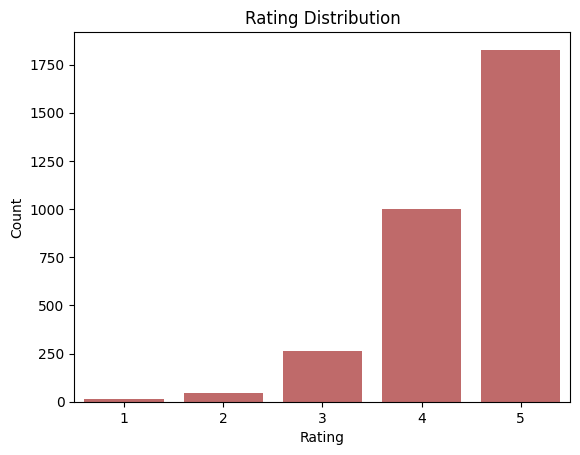

In [40]:
sns.countplot(x='rating', data=data, color='indianred')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Helpful Votes Distribution**

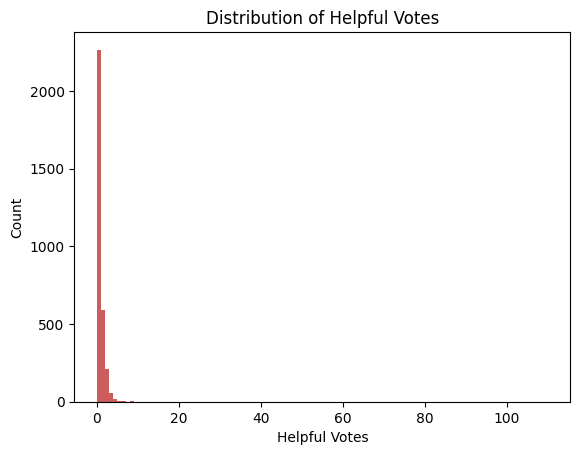

In [41]:
plt.hist(data['helpful_votes'], bins=range(0, data['helpful_votes'].max()), color='indianred')
plt.title('Distribution of Helpful Votes')
plt.xlabel('Helpful Votes')
plt.ylabel('Count')
plt.show()

**Reviews over Time**

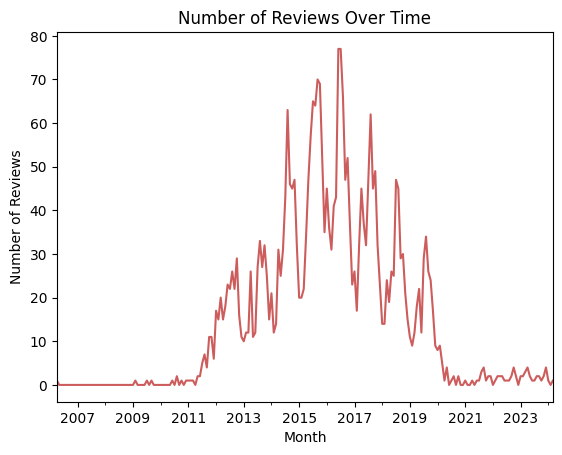

In [42]:
# Group by month
monthly_reviews = data.groupby(pd.Grouper(key='published_date', freq='M')).size()

# Plot the result
monthly_reviews.plot(color='indianred')
plt.title('Number of Reviews Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

**Reviews by Platform**

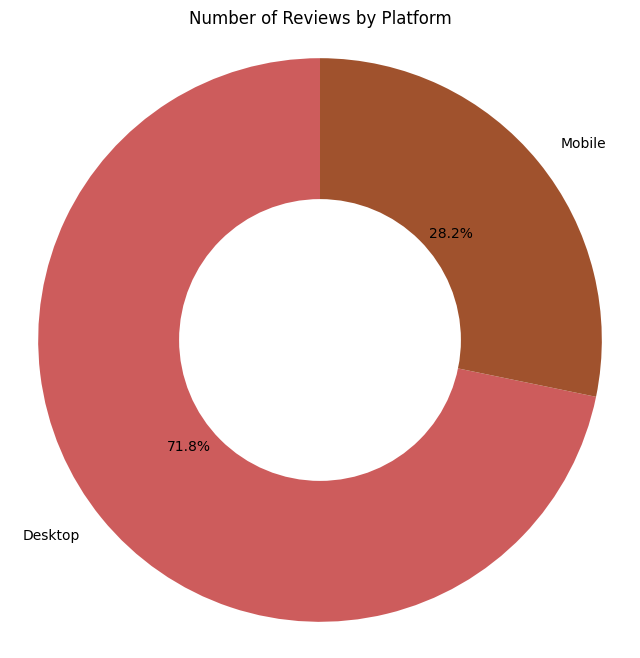

In [43]:
platform_counts = data['published_platform'].value_counts()

# Plot a donut chart
plt.figure(figsize=(8, 8))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=90, colors=['indianred', 'sienna'])

# Draw a white circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Number of Reviews by Platform')
plt.axis('equal')
plt.show()

**Wordclouds of Title per Published Platform**

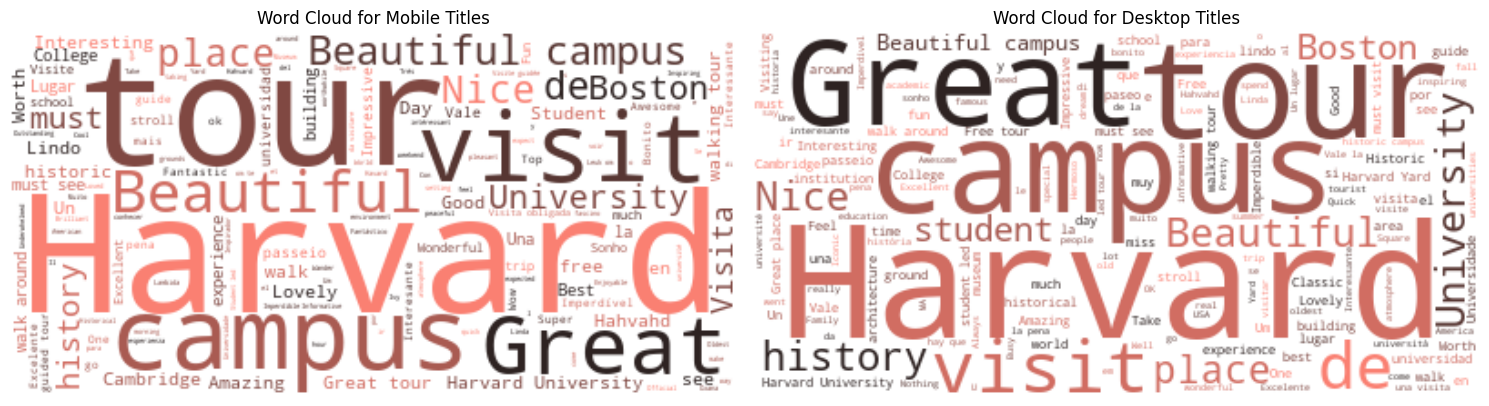

In [44]:
platforms = data['published_platform'].unique()
fig, axes = plt.subplots(1, len(platforms), figsize=(15, 5))

for i, platform in enumerate(platforms):
    # Concatenate titles for the current platform
    text = ' '.join(data[data['published_platform'] == platform]['title'])
    
    # Convert seaborn palette to a matplotlib ListedColormap
    cmap = ListedColormap(palette)
    
    # Generate word cloud with specified seaborn color palette
    wordcloud = WordCloud(width=400, height=200, background_color='white', colormap=cmap).generate(text)
    
    # Plot word cloud
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Word Cloud for {platform} Titles')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


**Wordclouds of Review per Language**

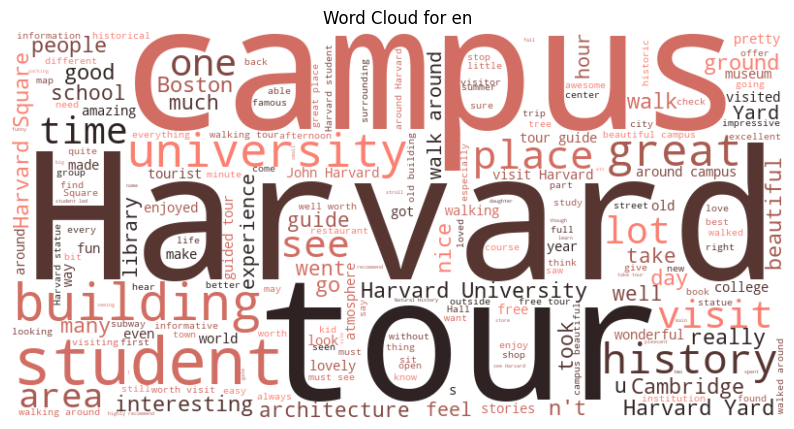

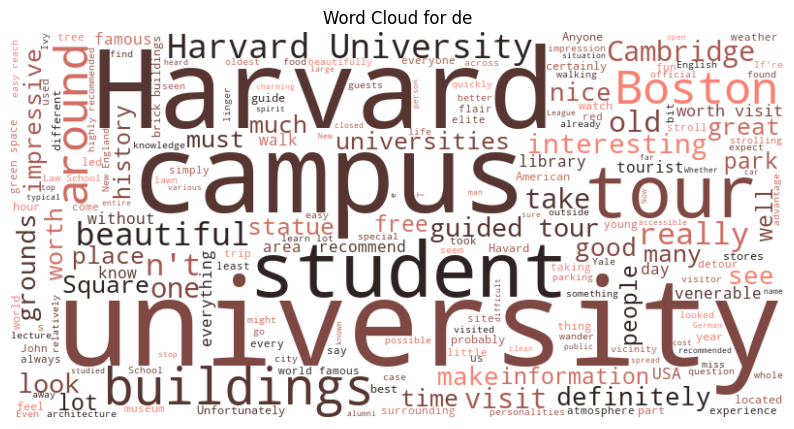

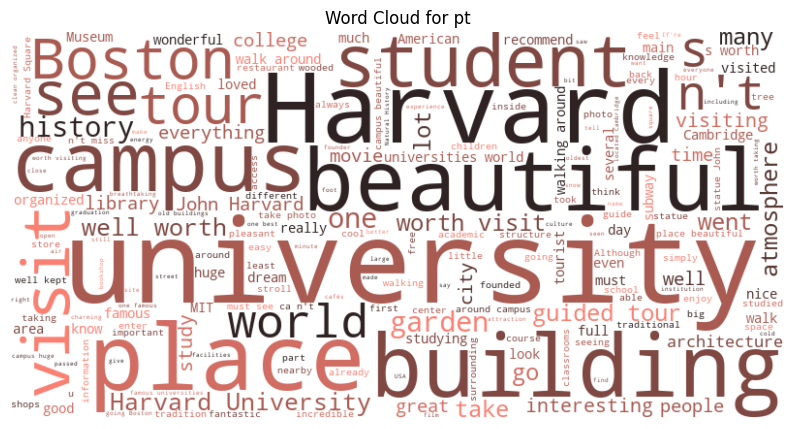

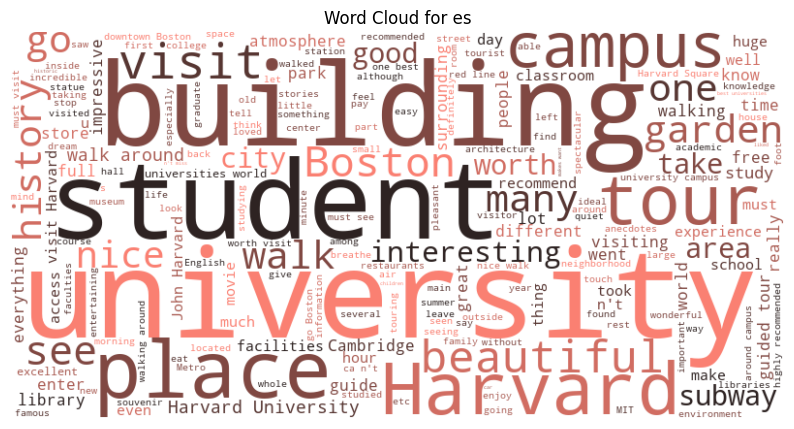

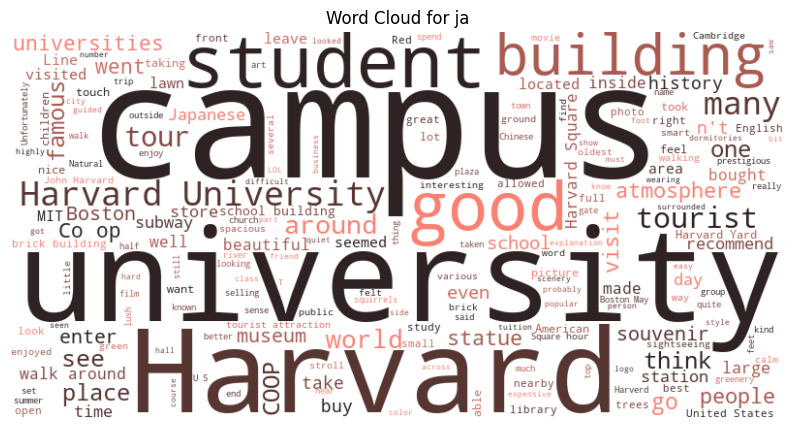

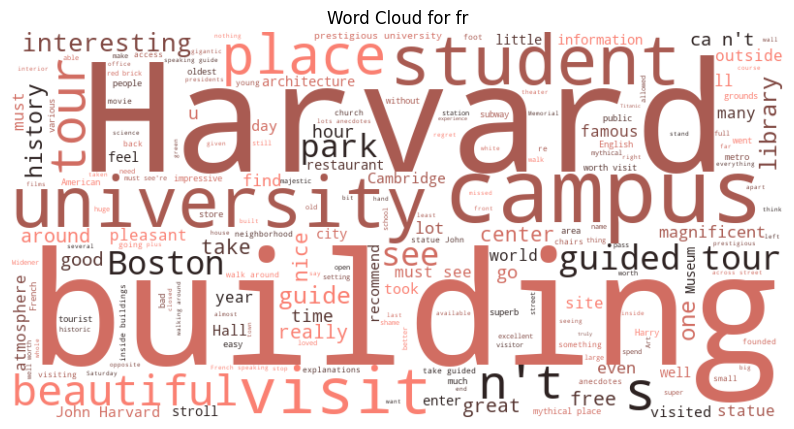

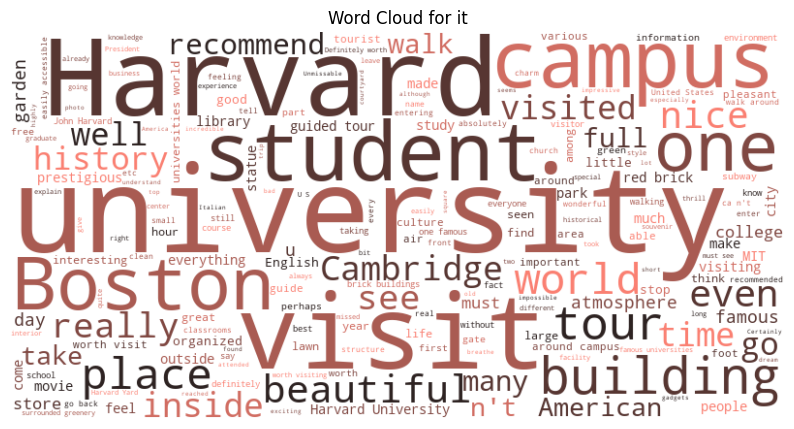

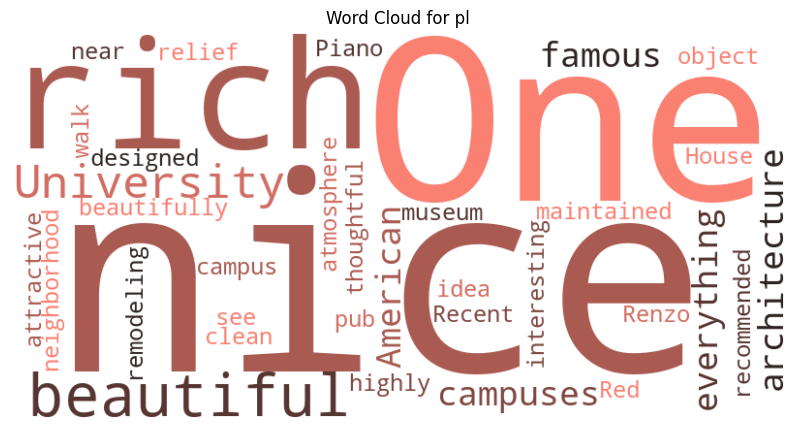

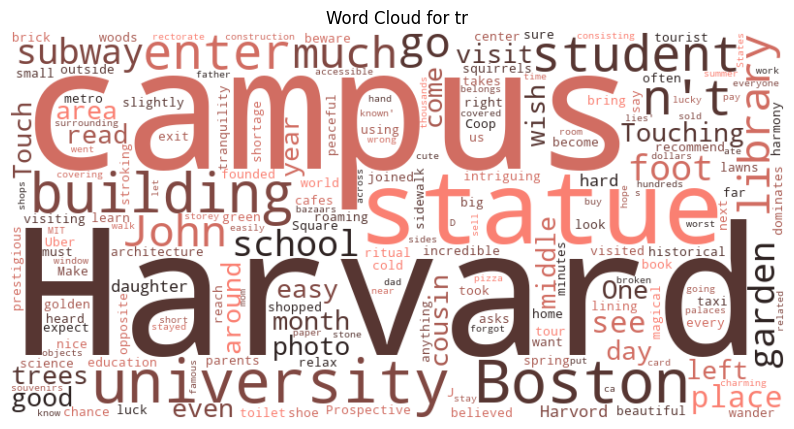

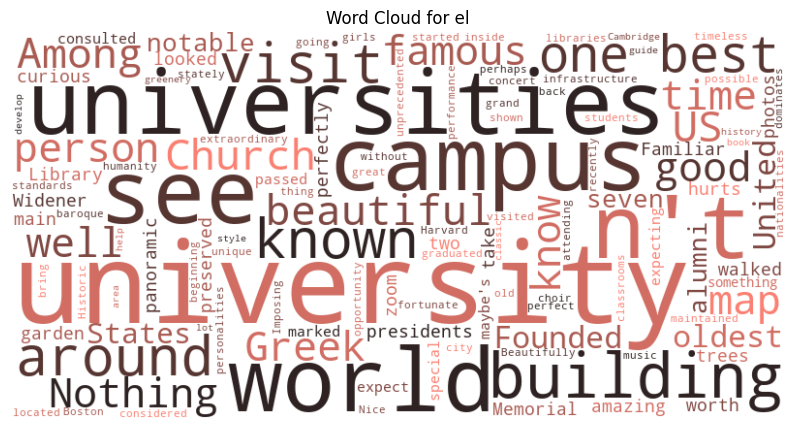

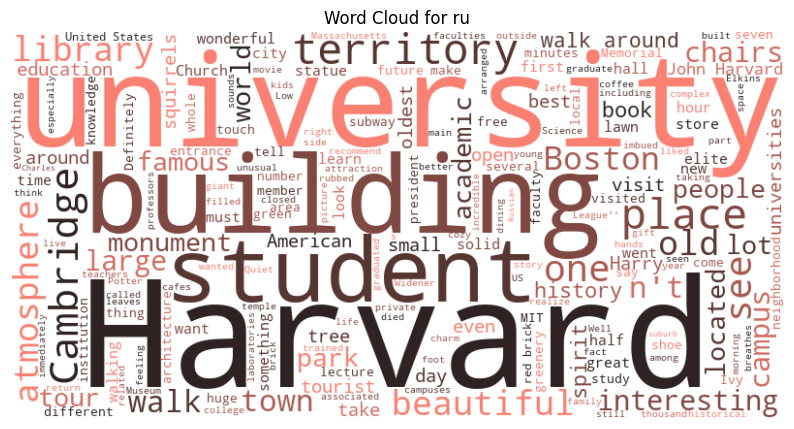

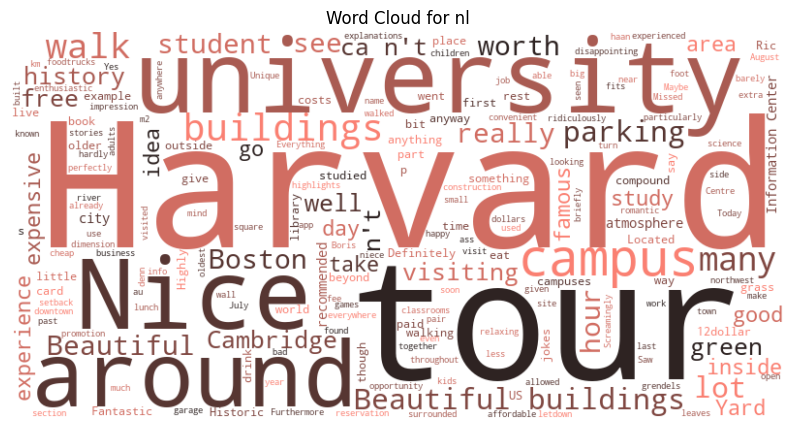

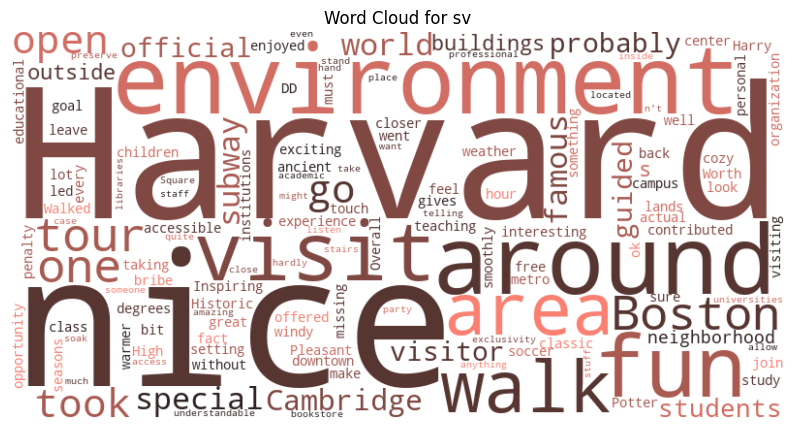

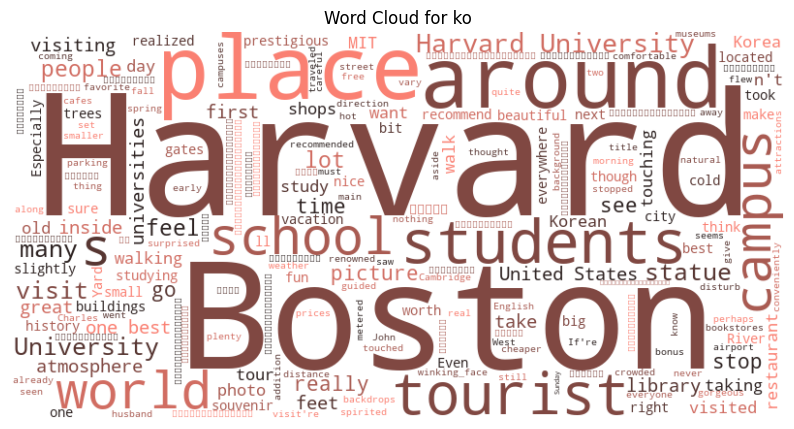

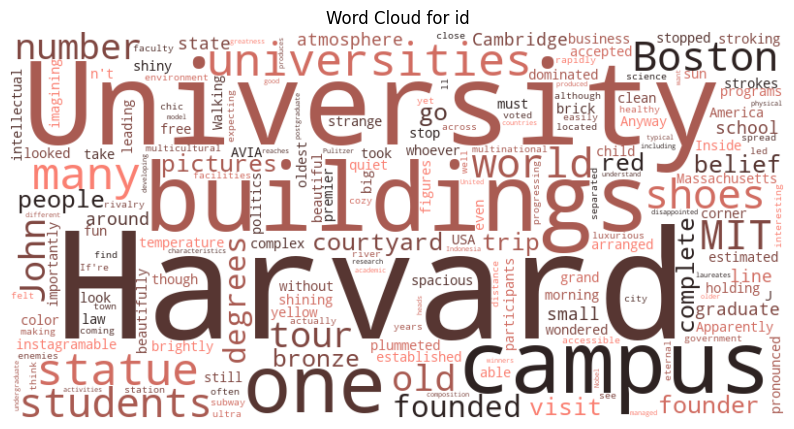

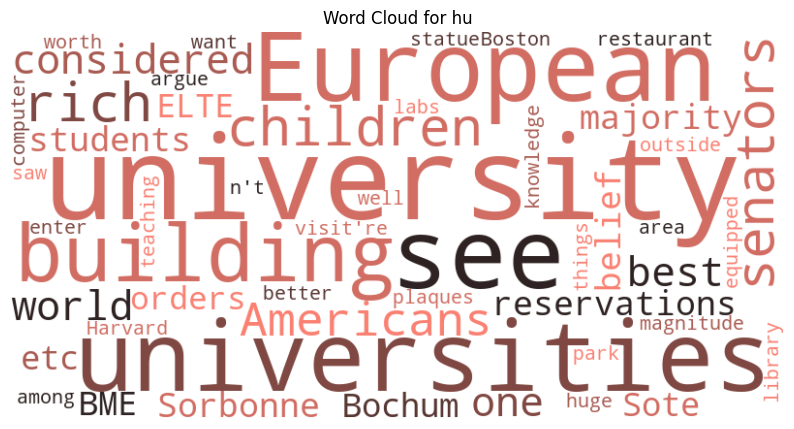

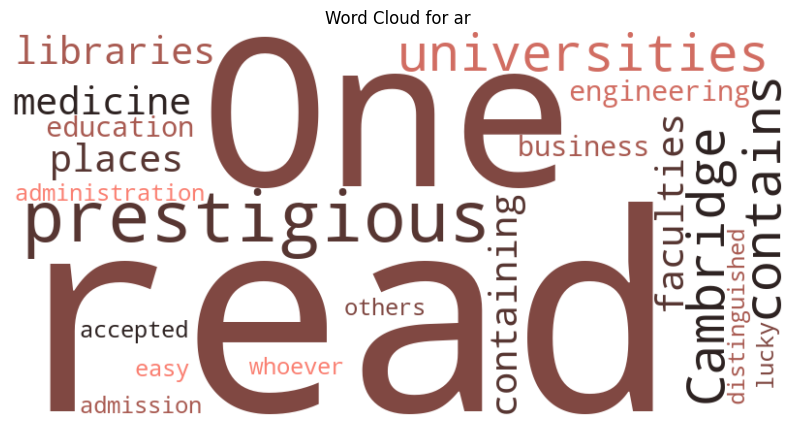

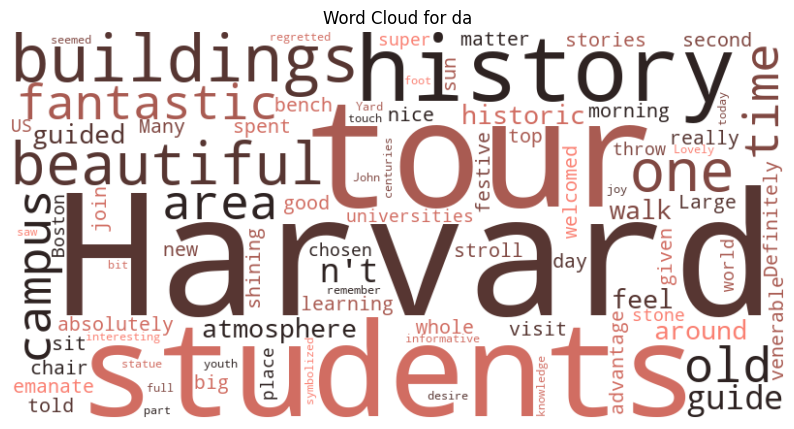

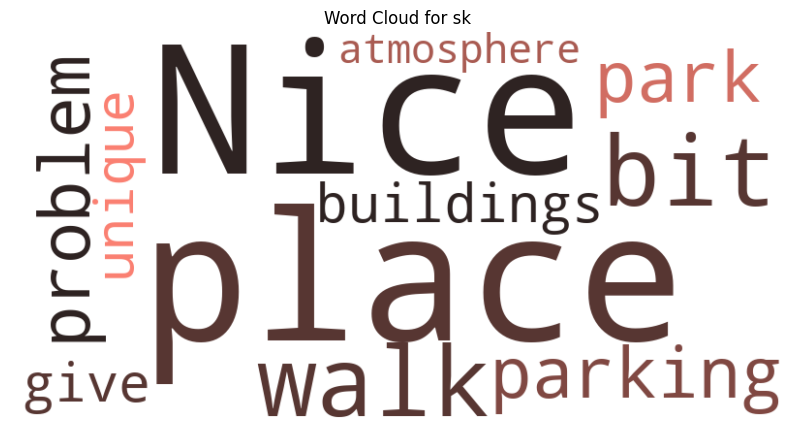

In [45]:
for language in data['language'].unique():
    # Filter text for the current language
    text = ' '.join(data[data['language'] == language]['clean_text'])
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=cmap).generate(text)
    
    # Plotting the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {language}')
    plt.axis('off')
    plt.show()

## 5. Export

Exporting clean data to be used in the next notebook.

In [39]:
data.to_csv('clean_data.csv', index=False)

** ** 

## 6. AI Statement

In this project AI was applied to help with the text translation, namely with the function *translate_with_deepl*, available in the *function2* file.